In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import statistics

In [13]:
all_df = []
for region in ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','rice/chr1_43M/real_ONT','ara/chr1_30M/real_ONT']:
    file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/'+region+'/kmer_k16/Exact_Cosine_None_IDF_overlap_sizes.pkl'
    file2 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/'+region+'/kmer_k16/Exact_Cosine_None_IDF_overlap_stat.tsv'
    with open(file1,'rb') as f:
        neighbor_overlap_sizes = pickle.load(f)
    df2 = pd.read_csv(file2,sep='\t')
    df2['neighbor'] = df2['n_neighbors'] -2 
    median = []
    for li in neighbor_overlap_sizes[:-1]:
        median.append(statistics.median(li))
    df2['overlap_median'] = median
    all_df.append(df2)

In [47]:
all_df1 = []
for method in ['TF','IDF','TF-IDF','None']:
    file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_sizes.pkl'
    file2 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_stat.tsv'
    with open(file1,'rb') as f:
        neighbor_overlap_sizes = pickle.load(f)
    df2 = pd.read_csv(file2,sep='\t')
    df2['neighbor'] = df2['n_neighbors'] -2 
    median = []
    for li in neighbor_overlap_sizes[:-1]:
        median.append(statistics.median(li))
    df2['overlap_median'] = median
    all_df1.append(df2)

In [ ]:
method = 'TF'
file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_sizes.pkl'
with open(file1,'rb') as f:
    neighbor_overlap_sizes = pickle.load(f)
colors = sns.color_palette("tab10")
data = []
for i, sublist in enumerate(neighbor_overlap_sizes):
    for value in sublist:
        data.append({'Group': f'{i+1}', 'Value': value})
df = pd.DataFrame(data)
fig, ax1 = plt.subplots(figsize=(8, 6),dpi=300)
sns.boxplot(x='Group', y='Value', data=df, ax=ax1,color = sns.color_palette("hls", 8)[2]
, showfliers=False)
ax1.set_xlabel('Neighbor Rank')
ax1.set_ylabel('Overlap Size')

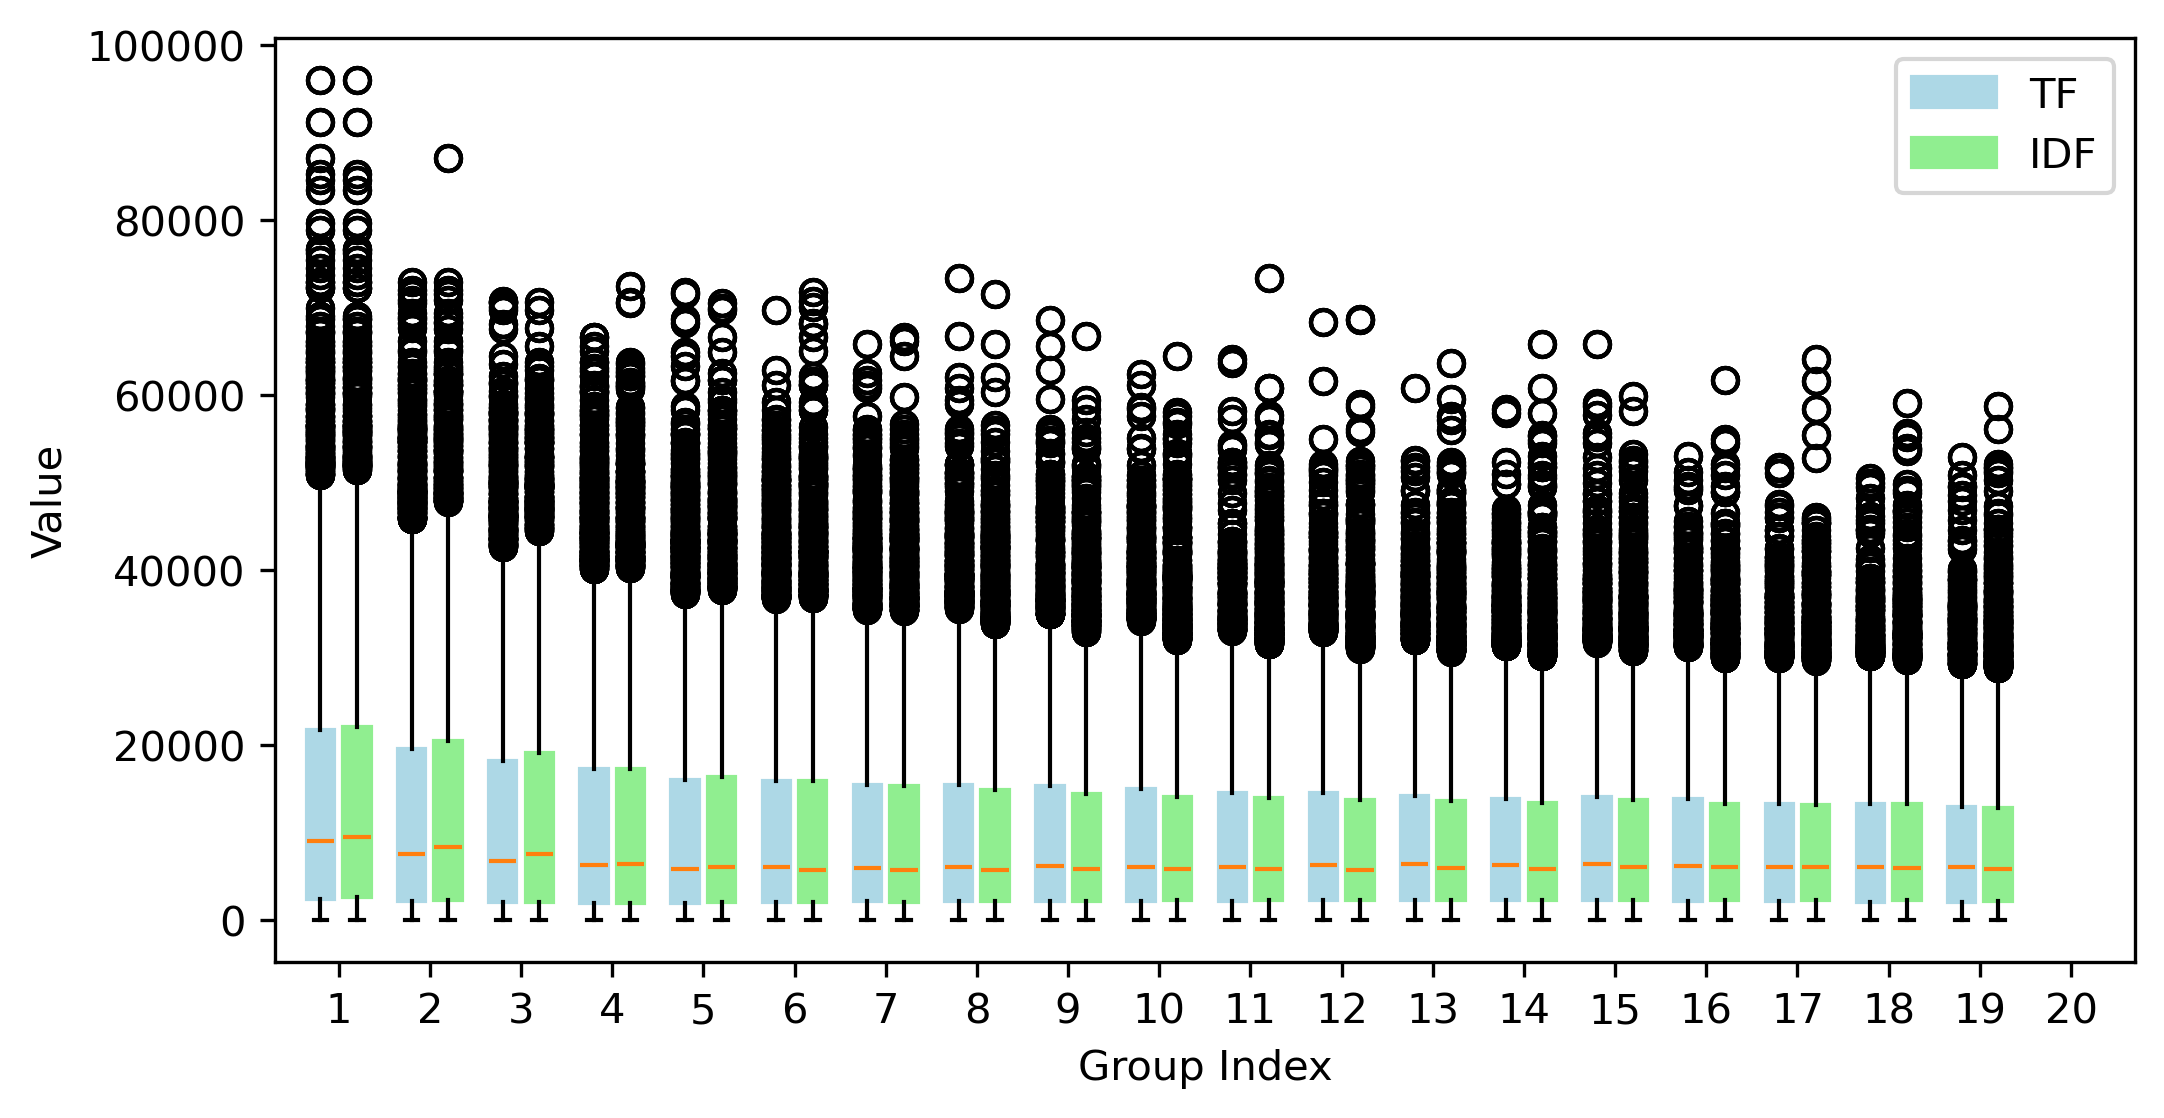

In [27]:
import matplotlib.pyplot as plt
import numpy as np


method = 'TF'
file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_sizes.pkl'
with open(file1,'rb') as f:
    list1 = pickle.load(f)
method = 'IDF'
file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_sizes.pkl'
with open(file1,'rb') as f:
    list2 = pickle.load(f)
# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(8, 4),dpi=300)

# 定义颜色
colors = ['lightblue', 'lightgreen']

# 绘制 list1 的箱型图
for i, data in enumerate(list1):
    positions = [i + 1 - 0.2]  # 横坐标位置（稍微左移）
    if i == 1 :
        boxplot = ax.boxplot(
            data,
            positions=positions,
            widths=0.3,  # 箱型图宽度
            patch_artist=True,  # 填充颜色
            boxprops=dict(facecolor=colors[0], color=colors[0]),
            #showfliers=False,  # 设置颜色
            label='TF'
        )
    else:
        boxplot = ax.boxplot(
            data,
            positions=positions,
            widths=0.3,  # 箱型图宽度
            patch_artist=True,  # 填充颜色
            boxprops=dict(facecolor=colors[0], color=colors[0]),
            #showfliers=False, 
        )

# 绘制 list2 的箱型图
for i, data in enumerate(list2):
    positions = [i + 1 + 0.2]  # 横坐标位置（稍微右移）
    if i == 1 :

        boxplot = ax.boxplot(
            data,
            positions=positions,
            widths=0.3,  # 箱型图宽度
            patch_artist=True,  # 填充颜色
            boxprops=dict(facecolor=colors[1], color=colors[1]),
            #showfliers=False,
            label='IDF'
        )
    else:
        boxplot = ax.boxplot(
            data,
            positions=positions,
            widths=0.3,  # 箱型图宽度
            patch_artist=True,  # 填充颜色
            boxprops=dict(facecolor=colors[1], color=colors[1]),
            #showfliers=False, 
        )

# 设置横坐标标签
ax.set_xticks(range(1, len(list1) + 1))
ax.set_xticklabels([f'{i+1}' for i in range(len(list1))])

# 添加标题和标签
ax.set_xlabel('Group Index')
ax.set_ylabel('Value')
ax.legend()

# 显示图表
plt.show()

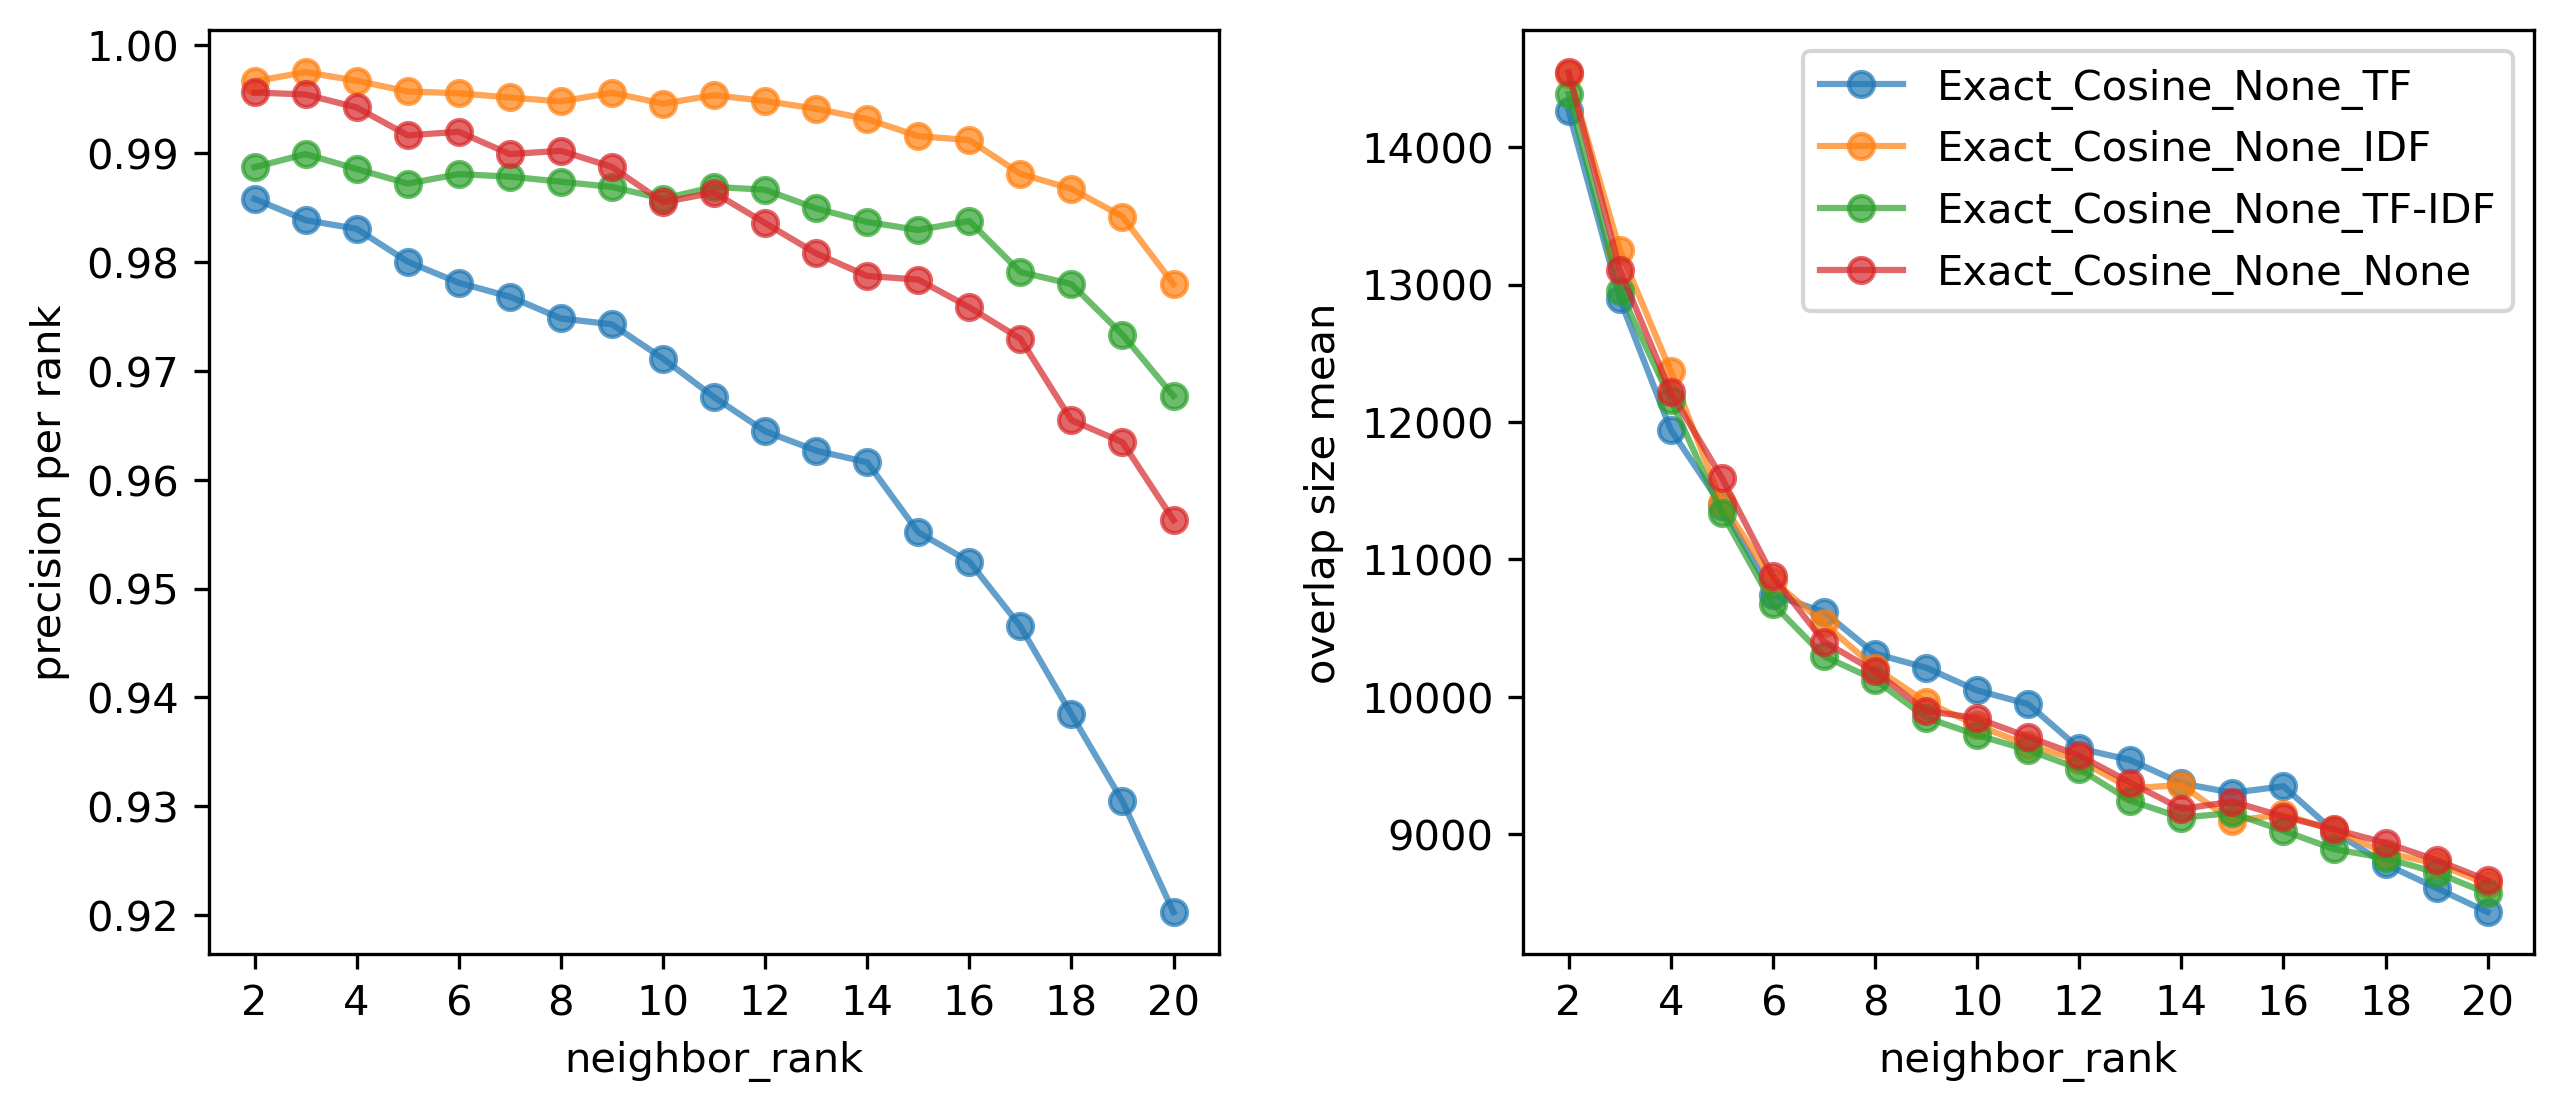

In [13]:
all_df1 = []
for method in ['TF','IDF','TF-IDF','None']:
    file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_sizes.pkl'
    file2 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_stat.tsv'
    with open(file1,'rb') as f:
        neighbor_overlap_sizes = pickle.load(f)
    df2 = pd.read_csv(file2,sep='\t')
    df2['neighbor'] = df2['n_neighbors'] -2 
    mean = []
    for li in neighbor_overlap_sizes[:-1]:
        mean.append(statistics.mean(li))
    df2['overlap_mean'] = mean
    all_df1.append(df2)
colors = sns.color_palette("tab10")
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4),dpi=300)
for i,df in enumerate(all_df1):
    ax1.plot(df['n_neighbors'] , df['precision_per_rank'], label =  df.loc[0,'description'],color= colors[i],marker='o',alpha=0.7)
    ax2.plot(df['n_neighbors'] , df['overlap_mean'], label =  df.loc[0,'description'],color= colors[i],marker='o',alpha=0.7)
ax1.set_xticks([i for i in df['n_neighbors'] if i%2==0])
ax2.set_xticks([i for i in df['n_neighbors'] if i%2==0])
ax1.set_xlabel('neighbor_rank')
ax1.set_ylabel('precision per rank')
ax2.set_ylabel('overlap size mean')
ax2.set_xlabel('neighbor_rank')
fig.subplots_adjust(wspace=0.3)

plt.legend()


In [19]:
pip install pyahocorasick

DEPRECATION: Loading egg at /home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/3172702e82c9c1d9450fdd20452651b9_/lib/python3.12/site-packages/GenomeTools-1.6.5-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not find a version that satisfies the requirement pyahocorasick (from versions: none)
ERROR: No matching distribution found for pyahocorasick
Note: you may need to restart the kernel to use updated packages.


In [27]:
import ahocorasick


In [32]:
names = ["apple", "banana", "cherry"]
fields = ["I like apple", "banana is good", "no match here"]

automaton = ahocorasick.Automaton()

for name in names:
    automaton.add_word(name, name)

automaton.make_automaton()
def findit_with_ahocorasick(element):
    try:
        return next(automaton.iter(element))
    except StopIteration:
        return None


findit_with_ahocorasick("I like apple banana")

(11, 'apple')

In [39]:

text = "ushers are here, she is his sister. She is his sister."
keywords = ["he", "she", "his", "hers"]

A = ahocorasick.Automaton()

for keyword in keywords:
    A.add_word(keyword, keyword)  # 关联值直接使用关键词本身

A.make_automaton()

keyword_counts = {keyword: 0 for keyword in keywords}

for end_index, matched_keyword in A.iter(text):
    keyword_counts[matched_keyword] += 1
keyword_counts


{'he': 4, 'she': 2, 'his': 2, 'hers': 1}

In [34]:
'apple' in automaton

True

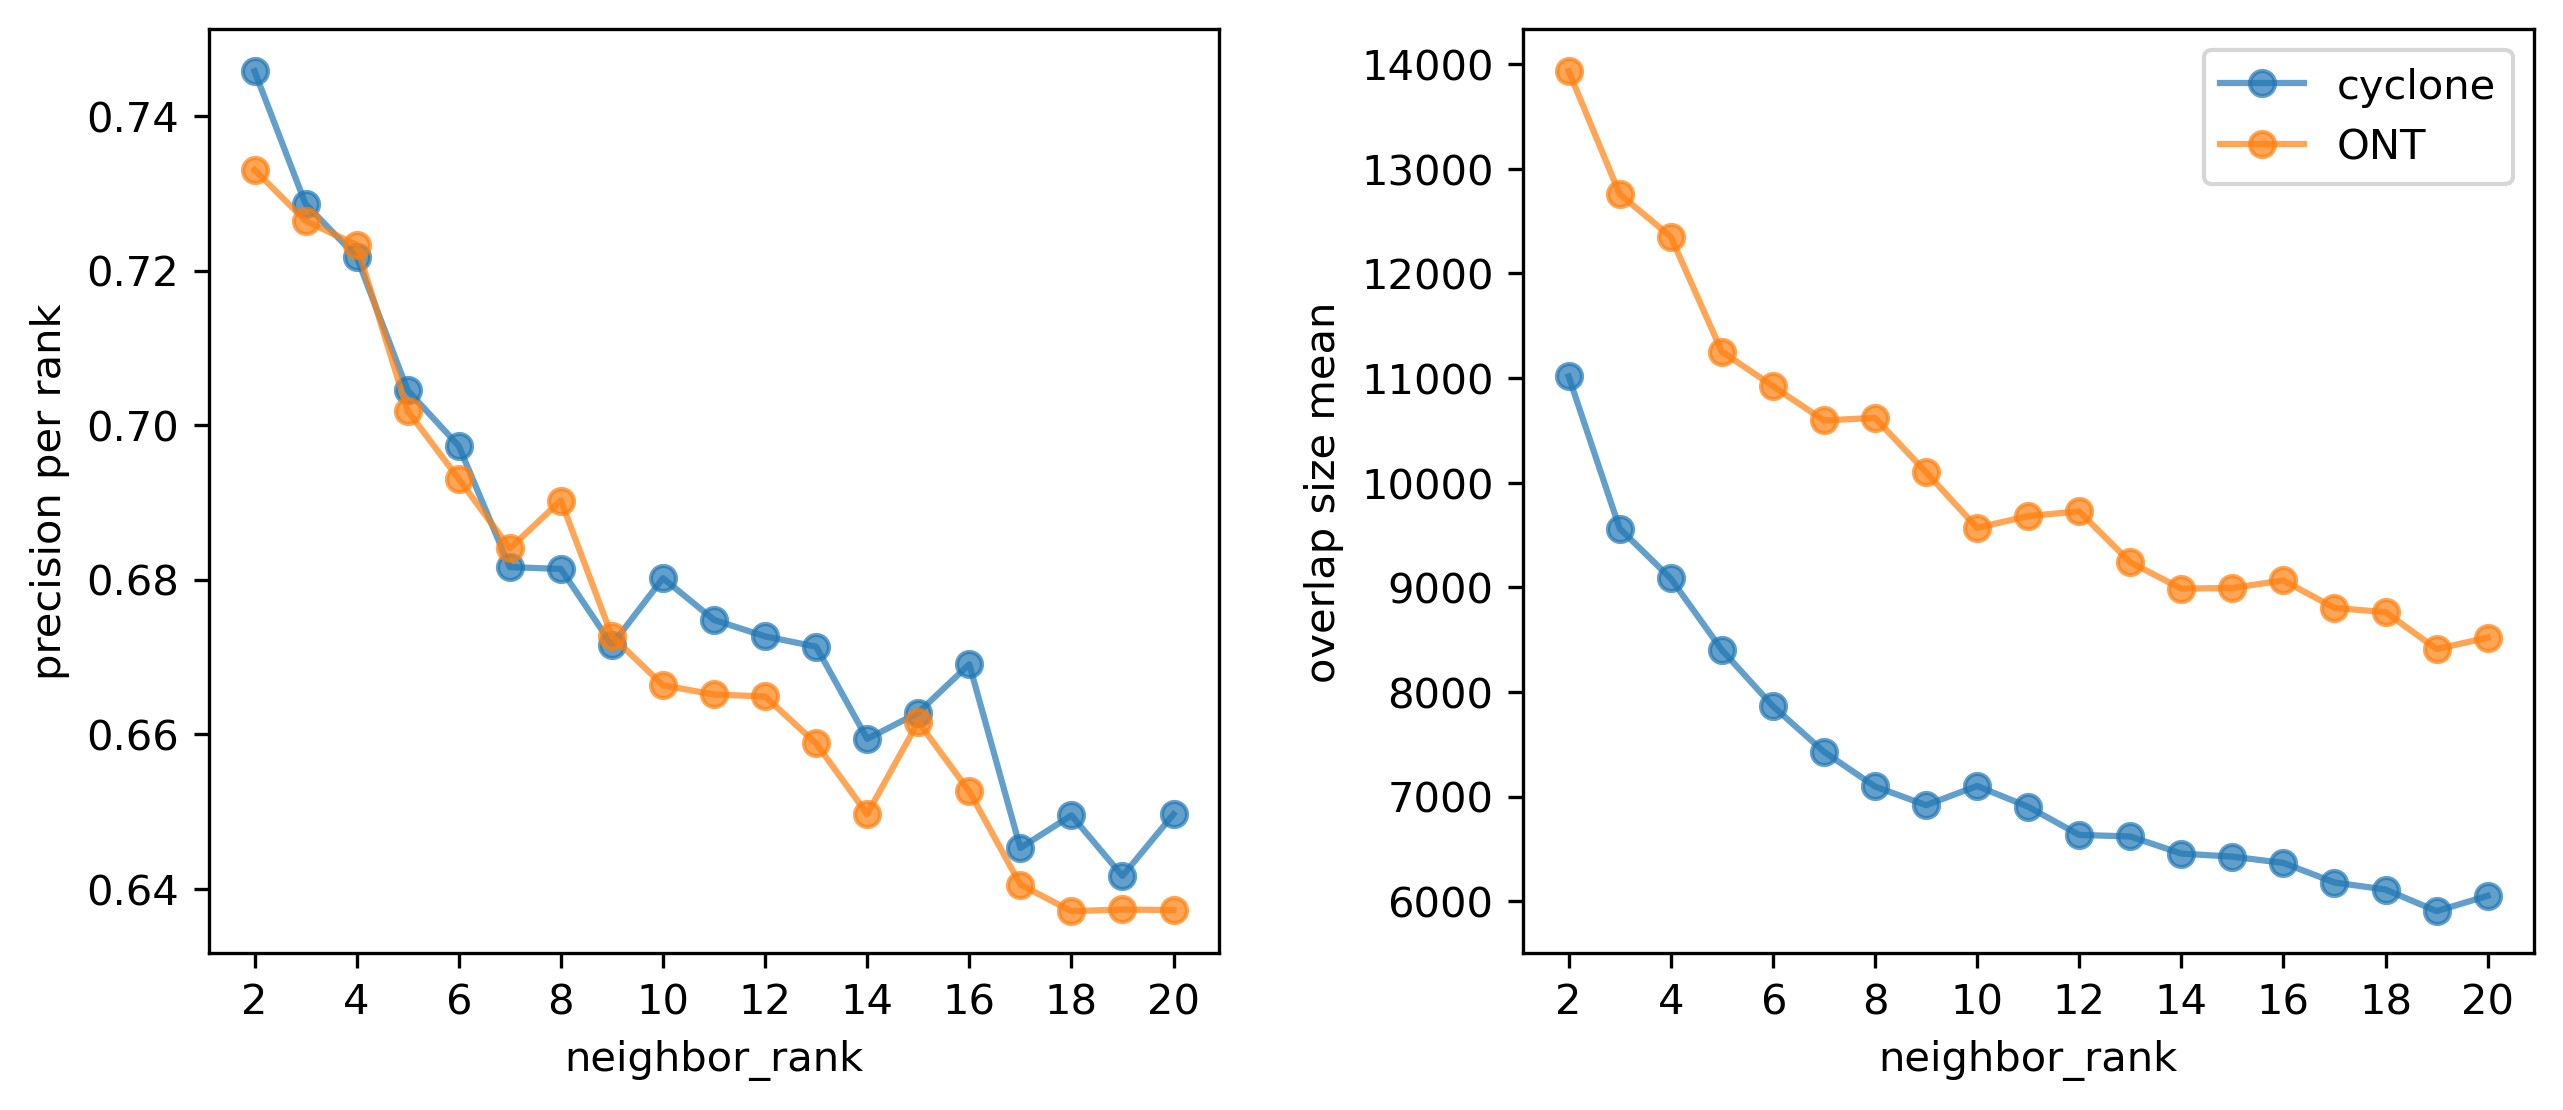

In [16]:
all_df1 = []
for platform in ['cyclone','ONT']:
    file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/real_' + platform + '/kmer_k16/Exact_Cosine_None_IDF_overlap_sizes.pkl'
    file2 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/real_' + platform + '/kmer_k16/Exact_Cosine_None_IDF_overlap_stat.tsv'
    with open(file1,'rb') as f:
        neighbor_overlap_sizes = pickle.load(f)
    df2 = pd.read_csv(file2,sep='\t')
    df2['neighbor'] = df2['n_neighbors'] -2 
    mean = []
    for li in neighbor_overlap_sizes[:-1]:
        mean.append(statistics.mean(li))
    df2['overlap_mean'] = mean
    all_df1.append(df2)
colors = sns.color_palette("tab10")
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4),dpi=300)
for i,df in enumerate(all_df1):
    ax1.plot(df['n_neighbors'] , df['precision_per_rank'], label = ['cyclone','ONT'][i],color= colors[i],marker='o',alpha=0.7)
    ax2.plot(df['n_neighbors'] , df['overlap_mean'], label = ['cyclone','ONT'][i],color= colors[i],marker='o',alpha=0.7)
ax1.set_xticks([i for i in df['n_neighbors'] if i%2==0])
ax2.set_xticks([i for i in df['n_neighbors'] if i%2==0])
ax1.set_xlabel('neighbor_rank')
ax1.set_ylabel('precision per rank')
ax2.set_ylabel('overlap size mean')
ax2.set_xlabel('neighbor_rank')
fig.subplots_adjust(wspace=0.3)

plt.legend()
 

In [7]:
all_df1[1]

,Unnamed: 0,description,n_neighbors,precision_per_rank,precision,nr_precision,recall,nr_recall,singleton_count,singleton_fraction,component_sizes,N50,continuity,connected_fraction,neighbor,overlap_mean
0,0,Exact_Cosine_None_IDF,2,0.998598,0.998097,0.328795,0.059991,0.261589,24,0.001820,182,221,0.033510,0.998180,0,19141.065672
1,1,Exact_Cosine_None_IDF,3,0.998006,0.997972,0.292696,0.088042,0.341797,12,0.000910,22,1605,0.243366,0.999090,1,18027.577268
2,2,Exact_Cosine_None_IDF,4,0.997754,0.997843,0.266376,0.115319,0.407485,6,0.000455,10,4577,0.694011,0.999545,2,17025.168866
3,3,Exact_Cosine_None_IDF,5,0.997772,0.997799,0.244122,0.142273,0.460750,6,0.000455,10,4577,0.694011,0.999545,3,16409.484605
4,4,Exact_Cosine_None_IDF,6,0.997636,0.997867,0.227668,0.168764,0.509667,4,0.000303,8,4578,0.694162,0.999697,4,16039.984049
5,5,Exact_Cosine_None_IDF,7,0.998275,0.997583,0.214295,0.194891,0.554158,4,0.000303,8,4578,0.694162,0.999697,5,15540.299352
6,6,Exact_Cosine_None_IDF,8,0.996737,0.997415,0.202070,0.220719,0.591894,4,0.000303,8,4578,0.694162,0.999697,6,15133.597135
7,7,Exact_Cosine_None_IDF,9,0.996875,0.997207,0.192321,0.246124,0.628310,4,0.000303,8,4578,0.694162,0.999697,7,14761.930741
8,8,Exact_Cosine_None_IDF,10,0.996746,0.997098,0.184362,0.271125,0.663561,4,0.000303,8,4578,0.694162,0.999697,8,14611.469704
9,9,Exact_Cosine_None_IDF,11,0.997215,0.997065,0.176975,0.295950,0.695318,4,0.000303,8,4578,0.694162,0.999697,9,14402.997284


In [29]:
method = 'TF'
file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_sizes.pkl'
with open(file1,'rb') as f:
    neighbor_overlap_sizes_tf = pickle.load(f)
method = 'IDF'
file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/Exact_Cosine_None_'+method+'_overlap_sizes.pkl'
with open(file1,'rb') as f:
    neighbor_overlap_sizes_idf = pickle.load(f)

In [32]:
tf7 = neighbor_overlap_sizes_tf[7]
idf7 = neighbor_overlap_sizes_idf[7]

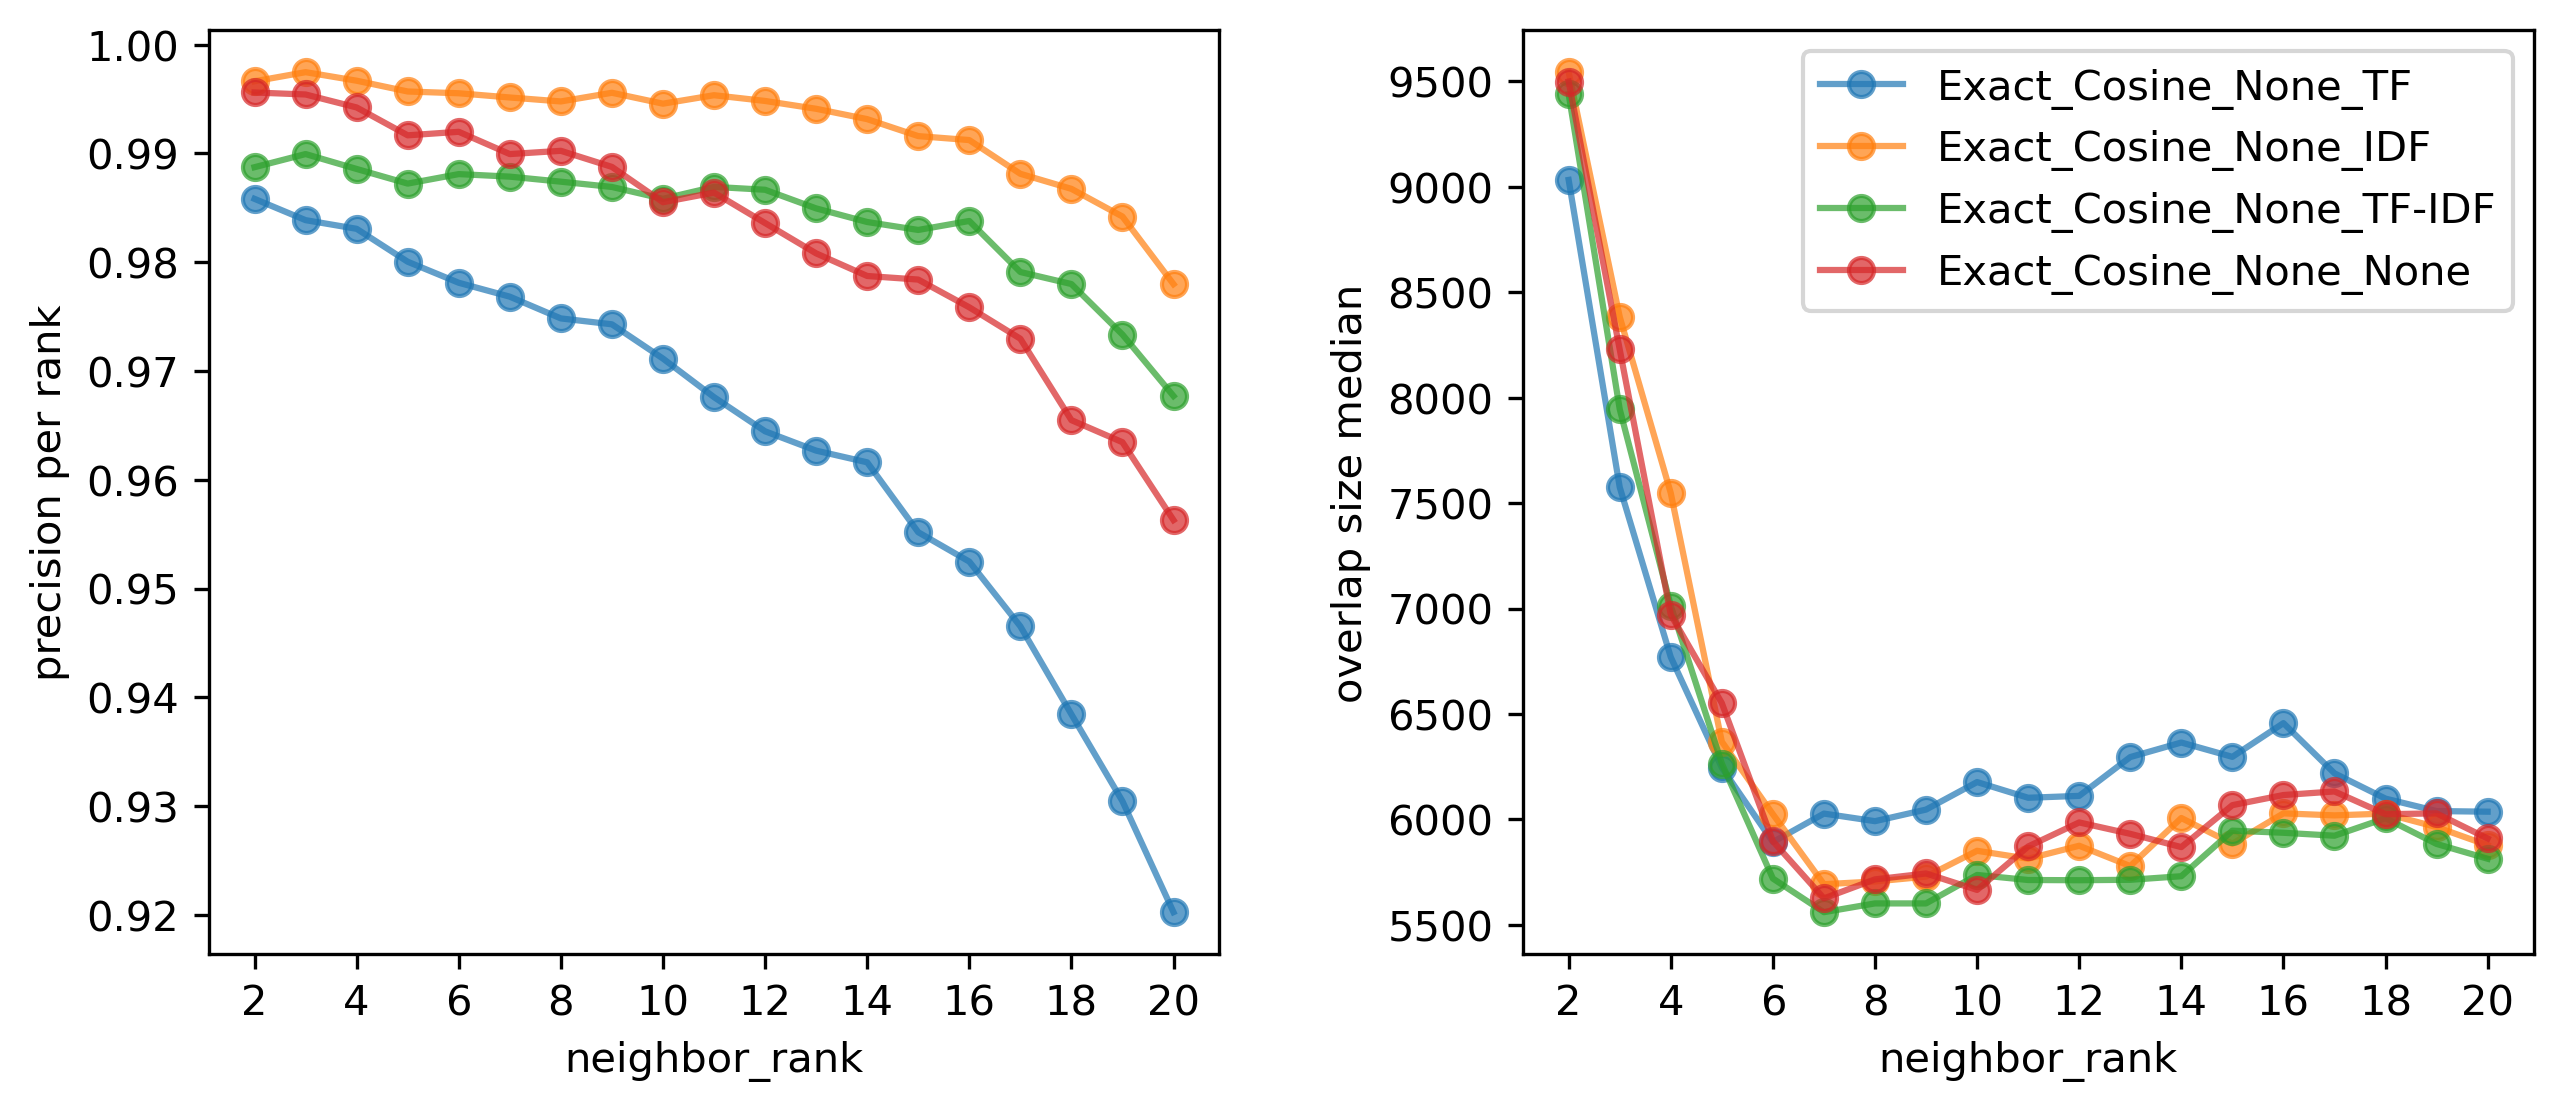

In [55]:
colors = sns.color_palette("tab10")
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4),dpi=300)
for i,df in enumerate(all_df1):
    ax1.plot(df['n_neighbors'] , df['precision_per_rank'], label =  df.loc[0,'description'],color= colors[i],marker='o',alpha=0.7)
    ax2.plot(df['n_neighbors'] , df['overlap_median'], label =  df.loc[0,'description'],color= colors[i],marker='o',alpha=0.7)
ax1.set_xticks([i for i in df['n_neighbors'] if i%2==0])
ax2.set_xticks([i for i in df['n_neighbors'] if i%2==0])
ax1.set_xlabel('neighbor_rank')
ax1.set_ylabel('precision per rank')
ax2.set_ylabel('overlap size median')
ax2.set_xlabel('neighbor_rank')
fig.subplots_adjust(wspace=0.3)

plt.legend()


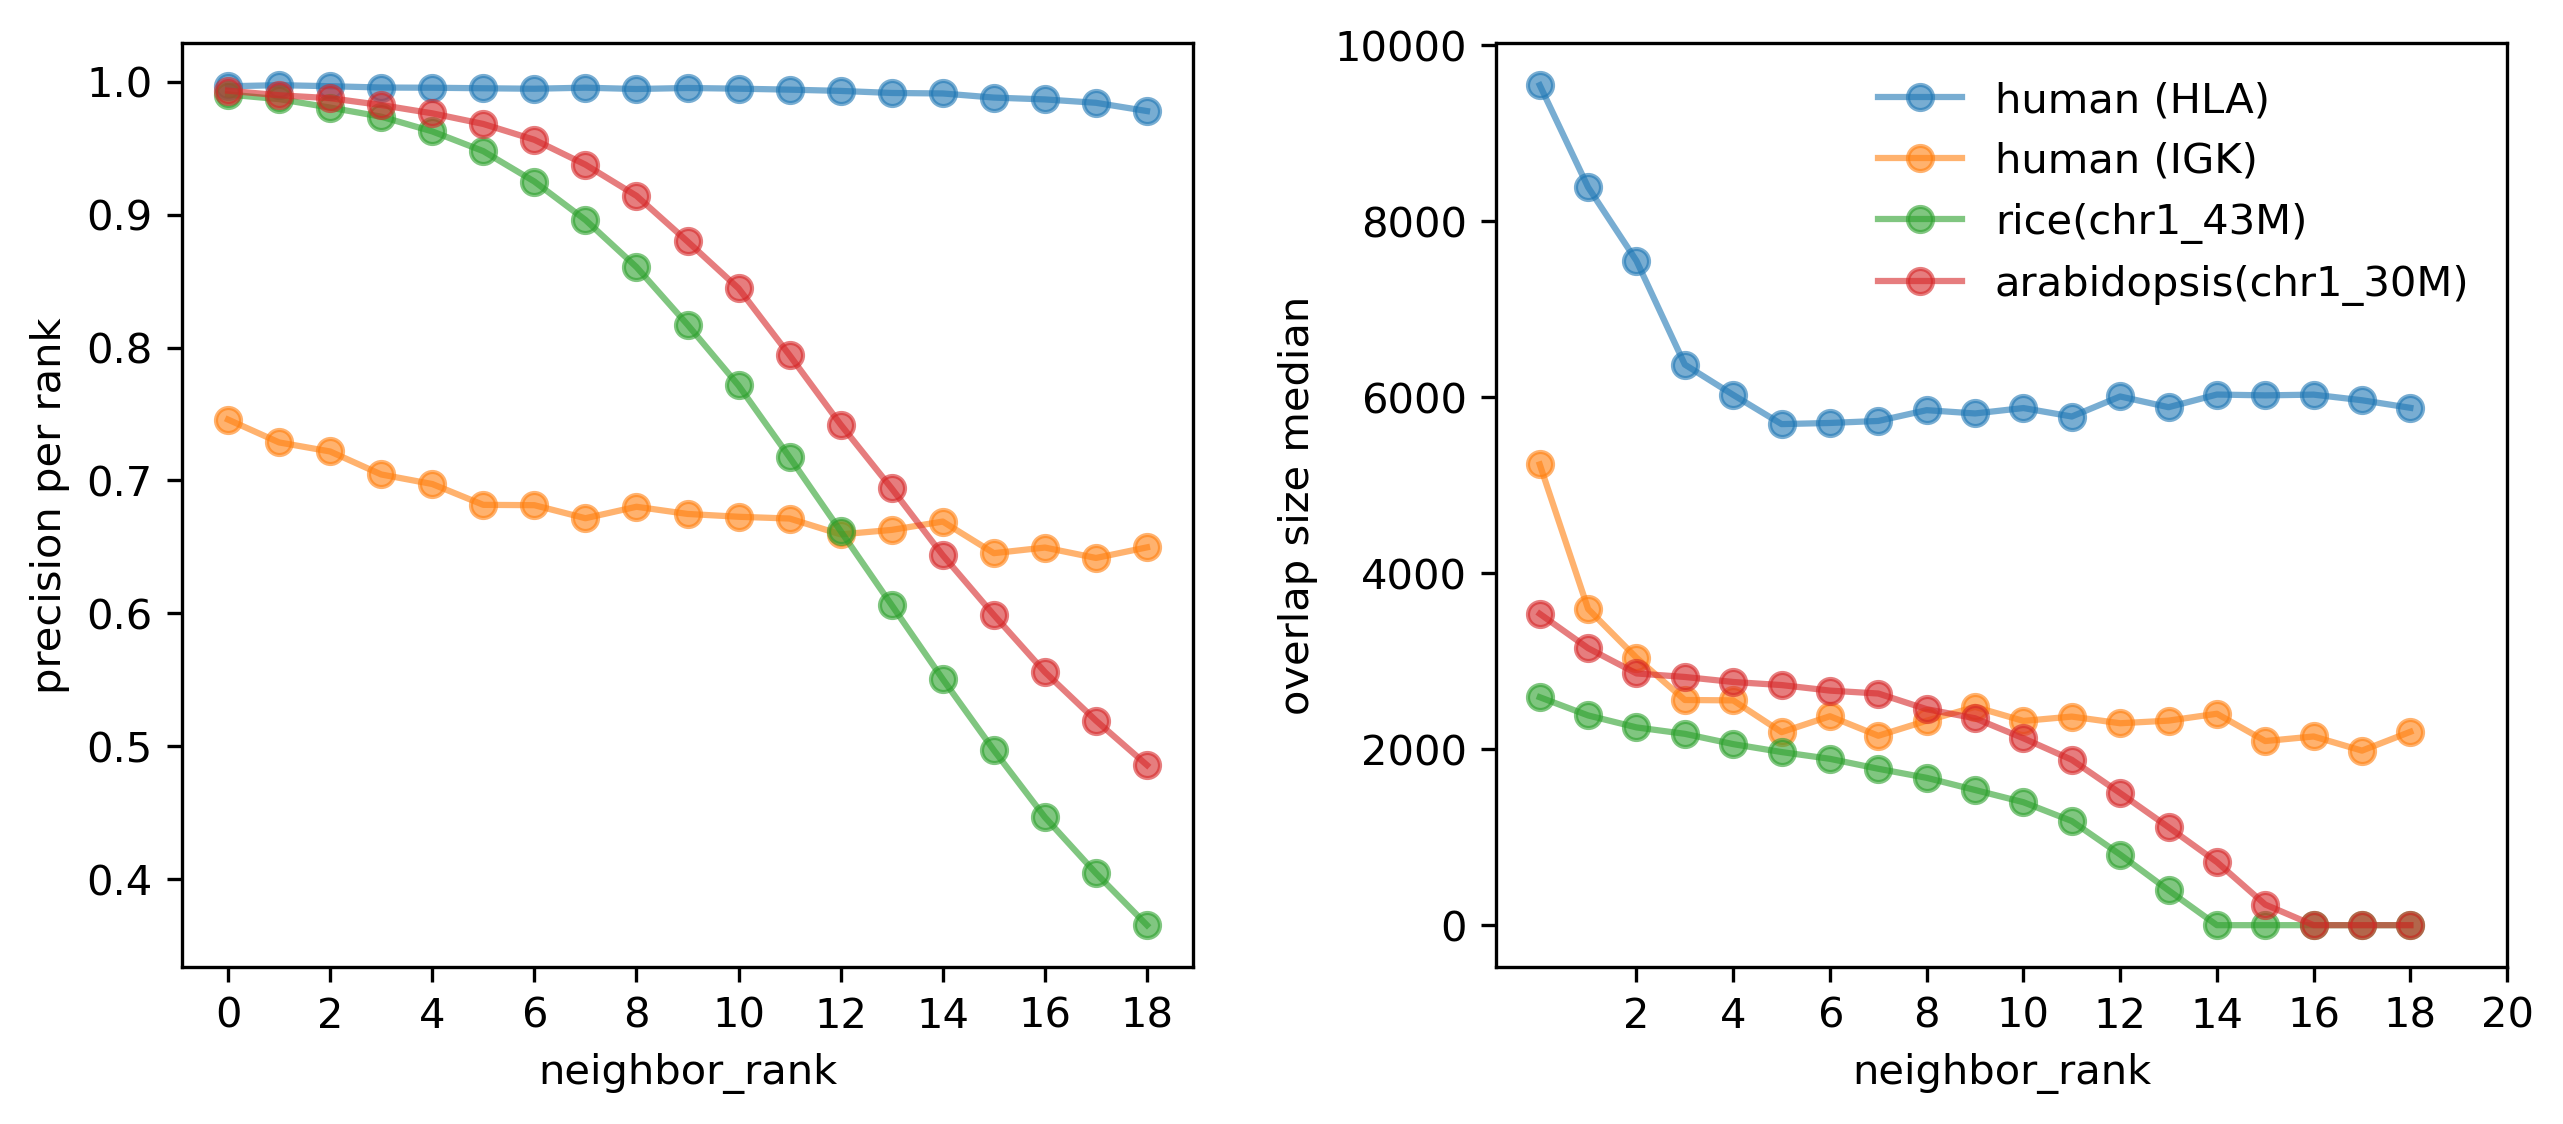

In [ ]:
all_df = []
regions = ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','rice/chr1_43M/real_ONT','ara/chr1_30M/real_ONT']
regions_in_pic = ['human (HLA)','human (IGK)','rice(chr1_43M)','arabidopsis(chr1_30M)']
for region in regions:
    file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/'+region+'/kmer_k16/Exact_Cosine_None_IDF_overlap_sizes.pkl'
    file2 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/'+region+'/kmer_k16/Exact_Cosine_None_IDF_overlap_stat.tsv'
    with open(file1,'rb') as f:
        neighbor_overlap_sizes = pickle.load(f)
    df2 = pd.read_csv(file2,sep='\t')
    df2['neighbor'] = df2['n_neighbors'] -2 
    median = []
    for li in neighbor_overlap_sizes[:-1]:
        median.append(statistics.median(li))
    df2['overlap_median'] = median
    all_df.append(df2)
colors = sns.color_palette("tab10")
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4),dpi=300)
for i,df in enumerate(all_df):
    ax1.plot(df['neighbor'] , df['precision_per_rank'], label = regions_in_pic[i] ,color= colors[i],marker='o',alpha=0.6)
    ax2.plot(df['neighbor'] , df['overlap_median'], label = regions_in_pic[i],color= colors[i],marker='o',alpha=0.6)
ax1.set_xticks([i for i in df['neighbor'] if i%2==0])
ax1.set_xlabel('neighbor_rank')
ax1.set_ylabel('precision per rank')
ax2.set_ylabel('overlap size median')
ax2.set_xlabel('neighbor_rank')
ax2.set_xticks([i for i in df['n_neighbors'] if i%2==0])
fig.subplots_adjust(wspace=0.3)
plt.legend(frameon=False)

Text(0, 0.5, 'Precision')

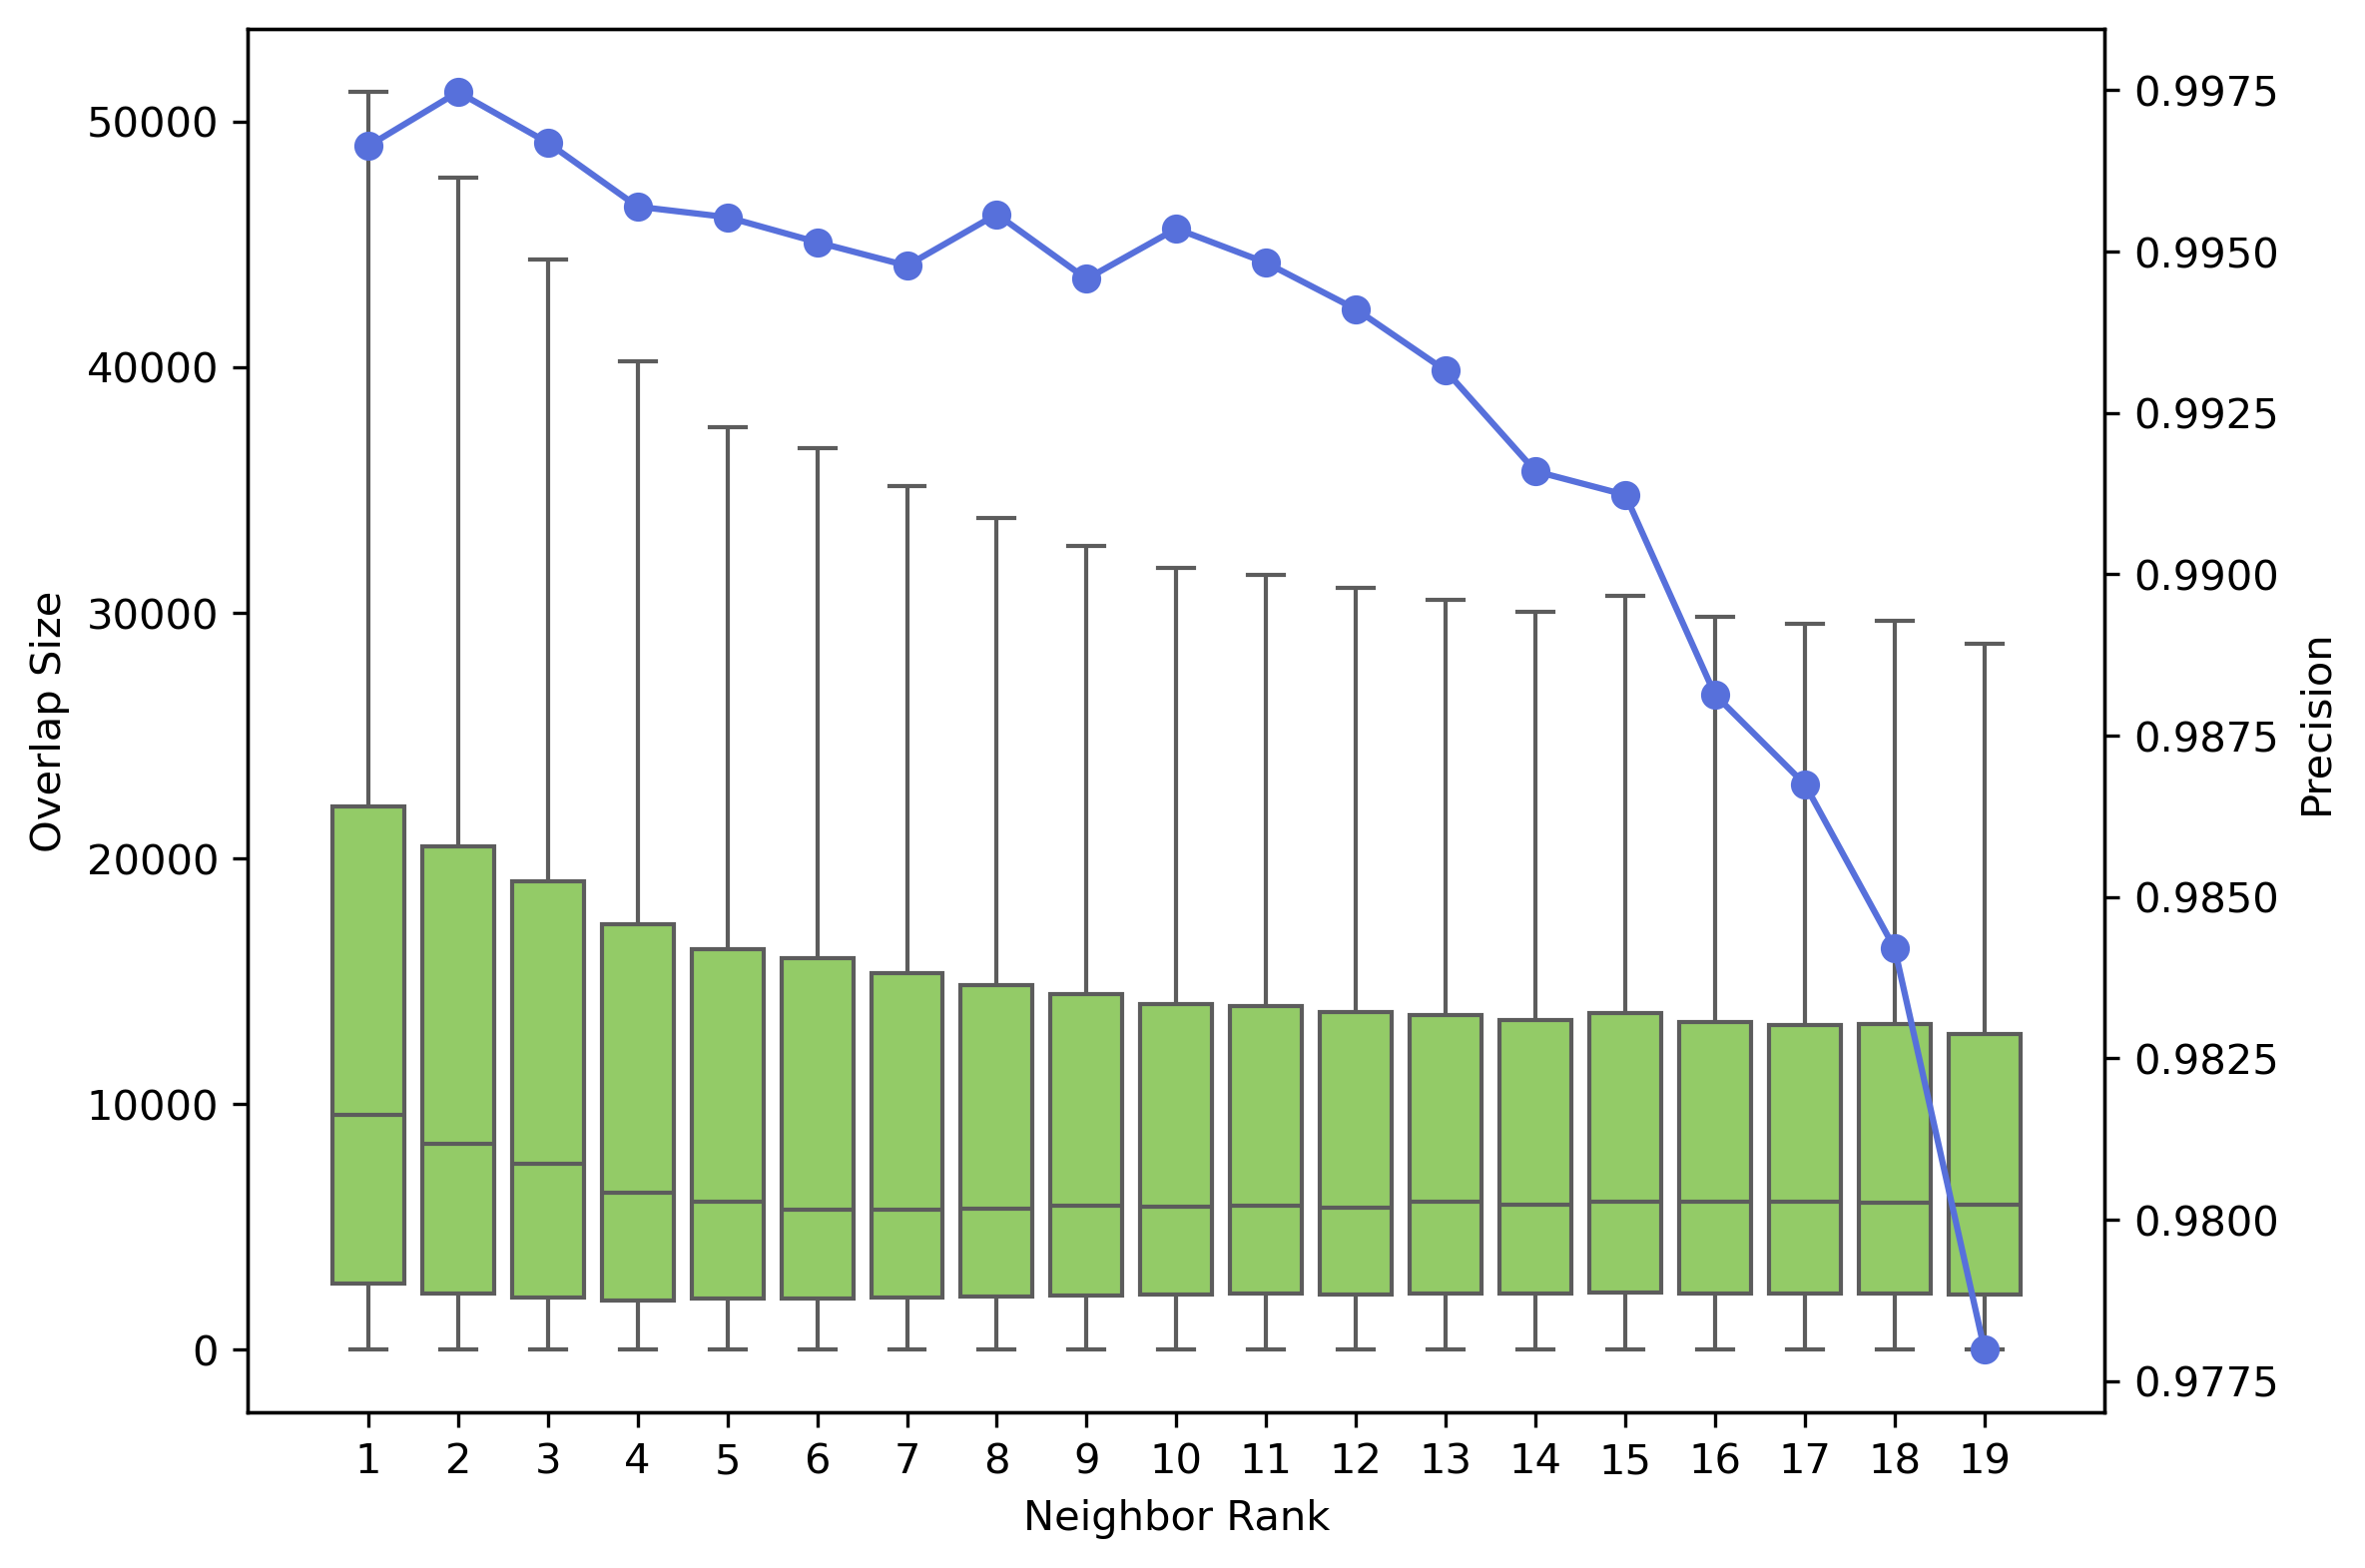

In [33]:
colors = sns.color_palette("tab10")
data = []
for i, sublist in enumerate(neighbor_overlap_sizes):
    for value in sublist:
        data.append({'Group': f'{i+1}', 'Value': value})
df = pd.DataFrame(data)
fig, ax1 = plt.subplots(figsize=(8, 6),dpi=300)
sns.boxplot(x='Group', y='Value', data=df, ax=ax1,color = sns.color_palette("hls", 8)[2]
, showfliers=False)
ax1.set_xlabel('Neighbor Rank')
ax1.set_ylabel('Overlap Size')
ax2 = ax1.twinx()
ax2.plot(df2['neighbor'] , df2['precision_per_rank'], color= sns.color_palette("hls", 8)[5],marker='o')
ax2.set_ylabel('Precision')
